In [1]:
#Exercise 1
ls

CIM_course_Tetralith.pdf   main_classification.py*
Day_part1.ipynb            main_regression-partI.py*
Part2.ipynb                main_regression-partII.py*
diabetes.csv*              pellworm_data.csv*


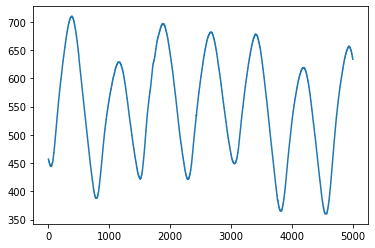

In [3]:
# %% TASK 1: Perform curve fitting with a deep neural network to fit the data 
# in better way than the baseline model. You have the following options:
# add more layers: model.add(Dense(units=xz, activation=xy))
# add more neurons xz
# use other activations, e.g., 'relu', 'sigmoid', 'elu'

import numpy
import pandas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.utils import shuffle

# %% load data and data set preparation (do not change)
# load tide gauge data [year month day hour minute height]
data = pandas.read_csv("pellworm_data.csv", header=None)
dataset = data.values
dataset = dataset.astype('float32')

# dataset size: number of data points x number of feature dimensions
D = dataset.shape[1]

# choose output data, choose only a subset (whole data set is too big)
N = 5000;
Y = dataset[0:N,D-1]

# choose input data: convert time data into index vector
dates = dataset[0:N,0:D-1]
X = numpy.array(range(0, N))
X = X.astype('float32')

# plot data
plt.plot(X, Y)
plt.show()

# scale data to range (0, 1)
X_min = X.min()
X = X - X_min
X_max = X.max()
X = X / X_max
Y_min = Y.min()
Y = Y - Y_min
Y_max = Y.max()
Y = Y / Y_max

Epoch 1/200
5000/5000 [==============================] - 1s 140us/step - loss: 0.1005
Epoch 2/200
5000/5000 [==============================] - 0s 51us/step - loss: 0.0720
Epoch 3/200
5000/5000 [==============================] - 0s 49us/step - loss: 0.0717
Epoch 4/200
5000/5000 [==============================] - 0s 63us/step - loss: 0.0712
Epoch 5/200
5000/5000 [==============================] - 0s 71us/step - loss: 0.0688
Epoch 6/200
5000/5000 [==============================] - 0s 67us/step - loss: 0.0627
Epoch 7/200
5000/5000 [==============================] - 0s 67us/step - loss: 0.0565
Epoch 8/200
5000/5000 [==============================] - 0s 64us/step - loss: 0.0548
Epoch 9/200
5000/5000 [==============================] - 0s 65us/step - loss: 0.0550
Epoch 10/200
5000/5000 [==============================] - 0s 64us/step - loss: 0.0545
Epoch 11/200
5000/5000 [==============================] - 0s 65us/step - loss: 0.0536
Epoch 12/200
5000/5000 [==============================] - 0s 6

5000/5000 [==============================] - 0s 61us/step - loss: 4.6673e-04
Epoch 187/200
5000/5000 [==============================] - 0s 67us/step - loss: 0.0014
Epoch 188/200
5000/5000 [==============================] - 0s 68us/step - loss: 8.2649e-05
Epoch 189/200
5000/5000 [==============================] - 0s 54us/step - loss: 5.7874e-04
Epoch 190/200
5000/5000 [==============================] - 0s 57us/step - loss: 0.0010
Epoch 191/200
5000/5000 [==============================] - 0s 63us/step - loss: 6.8159e-04
Epoch 192/200
5000/5000 [==============================] - 0s 60us/step - loss: 1.9379e-04
Epoch 193/200
5000/5000 [==============================] - 0s 62us/step - loss: 1.3880e-04
Epoch 194/200
5000/5000 [==============================] - 0s 56us/step - loss: 2.9895e-04
Epoch 195/200
5000/5000 [==============================] - 0s 56us/step - loss: 6.5513e-05
Epoch 196/200
5000/5000 [==============================] - 0s 56us/step - loss: 2.8966e-04
Epoch 197/200
5000/50

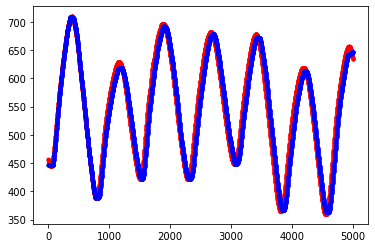

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_209 (Dense)            (None, 1)                 2         
_________________________________________________________________
dense_210 (Dense)            (None, 35)                70        
_________________________________________________________________
dense_211 (Dense)            (None, 35)                1260      
_________________________________________________________________
dense_212 (Dense)            (None, 35)                1260      
_________________________________________________________________
dense_213 (Dense)            (None, 35)                1260      
_________________________________________________________________
dense_214 (Dense)            (None, 35)                1260      
_________________________________________________________________
dense_215 (Dense)            (None, 35)              

In [27]:
# shuffle data for more stability during training
dates, X, Y = shuffle(dates, X, Y)

# %% baseline model 
model = Sequential()
model.add(Dense(units=1, input_dim=1, activation='linear'))
for x in range(10):
    model.add(Dense(units=35, input_dim=1, activation='relu'))
model.add(Dense(units=1, input_dim=1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

# run baseline model
model.fit(X, Y, epochs=200)
pred = model.predict(X)

# rescale and plot result
X = (X * X_max) + X_min
Y = (Y * Y_max) + Y_min
pred = (pred * Y_max) + Y_min
       
plt.plot(X, Y, 'r.') 
plt.plot(X, pred, 'b.') 
plt.show()

model.summary()

In [ ]:
#Excercise 2

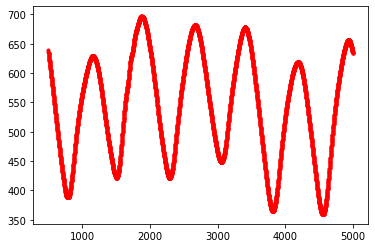

In [4]:
# %% TASK 2: Prediction of missing values in the curve
# Define a gap of missing data points in the curve and analyze which gap the 
# the model is able to 'fill'

import numpy
import pandas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.utils import shuffle

# %% loading data (do not change)
# load tide gauge data [year month day hour minute height]
data = pandas.read_csv("pellworm_data.csv", header=None)
dataset = data.values
dataset = dataset.astype('float32')

# %% size of gap of missing data points in the curve and starting point
gap = 500
start = 0

# %% data set preparation (do not change)
# dataset size: number of data points x number of feature dimensions
D = dataset.shape[1]

# choose output data, choose only a subset (whole data set is too big)
N = 5000
Y1 = dataset[0:start,D-1]
Y2 = dataset[(start+gap):N,D-1]
Y = numpy.concatenate((Y1,Y2))
Ytest = dataset[start:(start+gap),D-1]

# choose input data: convert time data into index vector
R = numpy.array(range(0, N))
X1 = R[0:start]
X2 = R[(start+gap):N]
X = numpy.concatenate((X1,X2))
Xtest = R[start:(start+gap)]
X = X.astype('float32')
Xtest = Xtest.astype('float32')
# plot data
plt.plot(X, Y, 'r.')
plt.show()

# scale data to range (-1, 1)
X_min = X.min()
X = X - X_min
X_max = X.max()
X = X / X_max
Xtest = (Xtest - X_min) / X_max
Y_min = Y.min()
Y = Y - Y_min
Y_max = Y.max()
Y = Y / Y_max
Ytest = (Ytest - Y_min) / Y_max


Epoch 1/100
4500/4500 [==============================] - 1s 116us/step - loss: 0.1021
Epoch 2/100
4500/4500 [==============================] - 0s 45us/step - loss: 0.0759
Epoch 3/100
4500/4500 [==============================] - 0s 44us/step - loss: 0.0761
Epoch 4/100
4500/4500 [==============================] - 0s 44us/step - loss: 0.0759
Epoch 5/100
4500/4500 [==============================] - 0s 45us/step - loss: 0.0755
Epoch 6/100
4500/4500 [==============================] - 0s 44us/step - loss: 0.0753
Epoch 7/100
4500/4500 [==============================] - 0s 44us/step - loss: 0.0751
Epoch 8/100
4500/4500 [==============================] - 0s 44us/step - loss: 0.0754
Epoch 9/100
4500/4500 [==============================] - 0s 44us/step - loss: 0.0750
Epoch 10/100
4500/4500 [==============================] - 0s 45us/step - loss: 0.0750
Epoch 11/100
4500/4500 [==============================] - 0s 48us/step - loss: 0.0733
Epoch 12/100
4500/4500 [==============================] - 0s 5

4500/4500 [==============================] - 0s 45us/step - loss: 4.0495e-04
Epoch 95/100
4500/4500 [==============================] - 0s 44us/step - loss: 5.9802e-04
Epoch 96/100
4500/4500 [==============================] - 0s 44us/step - loss: 3.4794e-04
Epoch 97/100
4500/4500 [==============================] - 0s 45us/step - loss: 0.0016
Epoch 98/100
4500/4500 [==============================] - 0s 44us/step - loss: 0.0010
Epoch 99/100
4500/4500 [==============================] - 0s 45us/step - loss: 1.9554e-04
Epoch 100/100
4500/4500 [==============================] - 0s 43us/step - loss: 2.1307e-04


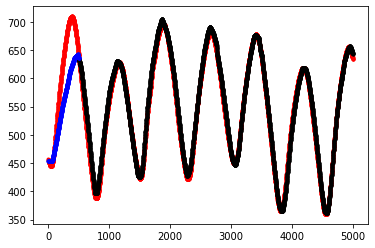

In [5]:
# shuffle data for more stability during training
X, Y = shuffle(X, Y)

# %% learning the model
#ADD HERE THE REGRESSION NETWORK
# %% baseline model 
model = Sequential()
model.add(Dense(units=1, input_dim=1, activation='linear'))
for x in range(8):
    model.add(Dense(units=30, input_dim=1, activation='relu'))
model.add(Dense(units=1, input_dim=1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')



# run baseline model
model.fit(X, Y, epochs=100)
pred = model.predict(X)
predtest = model.predict(Xtest) #ADD HERE THE PREDICTION CODE FOR THE TEST DATA

# %% rescale and plot result
X = (X * X_max) + X_min
Xtest = (Xtest * X_max) + X_min
Y = (Y * Y_max) + Y_min
Ytest = (Ytest * Y_max) + Y_min
pred = (pred * Y_max) + Y_min
predtest = (predtest * Y_max) + Y_min

plt.plot(X, Y,'r.') 
plt.plot(X, pred,'k.') 
plt.plot(Xtest, Ytest,'r.') 
plt.plot(Xtest, predtest, 'b.') 
plt.show()

In [ ]:
#Exercise 3

In [6]:
# %% TASK 3: Perform classification on Pima Indians Diabetes Database using
# your knowledge from the previous task
# Decide on your own which network you want to use and choose suitable
# hyperparameter such as number of epochs
# Hint: the last layer should be a sigmoid layer
# Hint: the number of neurons in the last layer equals the number of classes

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# %% load data and data set preparation (do not change)
data = pd.read_csv('diabetes.csv')
data.head()

# split into train and test data
dataset = data.values 
X = dataset[0:600,0:8]  # features
C = dataset[0:600,8]    # classes (0 or 1)
C = to_categorical(C, num_classes=2)
Xtest = dataset[601:,0:8]
Ctest = dataset[601:,8]
Ctest = to_categorical(Ctest, num_classes=2) 

# scale data to range (0, 1)
X_min = X.min()
X = X - X_min
X_max = X.max()
X = X / X_max
Xtest = (Xtest - X_min) / X_max

Epoch 1/120
600/600 [==============================] - 0s 415us/step - loss: 0.6847 - accuracy: 0.6533
Epoch 2/120
600/600 [==============================] - 0s 59us/step - loss: 0.6648 - accuracy: 0.6533
Epoch 3/120
600/600 [==============================] - 0s 61us/step - loss: 0.6501 - accuracy: 0.6533
Epoch 4/120
600/600 [==============================] - 0s 59us/step - loss: 0.6440 - accuracy: 0.6533
Epoch 5/120
600/600 [==============================] - 0s 59us/step - loss: 0.6364 - accuracy: 0.6533
Epoch 6/120
600/600 [==============================] - 0s 62us/step - loss: 0.6211 - accuracy: 0.6583
Epoch 7/120
600/600 [==============================] - 0s 57us/step - loss: 0.6056 - accuracy: 0.6650
Epoch 8/120
600/600 [==============================] - 0s 55us/step - loss: 0.5761 - accuracy: 0.7017
Epoch 9/120
600/600 [==============================] - 0s 55us/step - loss: 0.5574 - accuracy: 0.7333
Epoch 10/120
600/600 [==============================] - 0s 54us/step - loss: 0.55

600/600 [==============================] - 0s 48us/step - loss: 0.4743 - accuracy: 0.7583
Epoch 81/120
600/600 [==============================] - 0s 49us/step - loss: 0.4759 - accuracy: 0.7683
Epoch 82/120
600/600 [==============================] - 0s 47us/step - loss: 0.4812 - accuracy: 0.7567
Epoch 83/120
600/600 [==============================] - 0s 46us/step - loss: 0.4759 - accuracy: 0.7633
Epoch 84/120
600/600 [==============================] - 0s 48us/step - loss: 0.4781 - accuracy: 0.7600
Epoch 85/120
600/600 [==============================] - 0s 48us/step - loss: 0.4714 - accuracy: 0.7633
Epoch 86/120
600/600 [==============================] - 0s 46us/step - loss: 0.4811 - accuracy: 0.7433
Epoch 87/120
600/600 [==============================] - 0s 48us/step - loss: 0.4729 - accuracy: 0.7600
Epoch 88/120
600/600 [==============================] - 0s 47us/step - loss: 0.4792 - accuracy: 0.7583
Epoch 89/120
600/600 [==============================] - 0s 53us/step - loss: 0.4965 - 

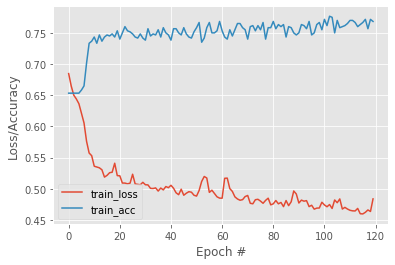

In [10]:
epochsVal = 120 #ADD HERE THE NUMBER OF EPOCHS

#ADD HERE YOUR NEURAL NETWORK
# %% baseline model 
model = Sequential()
model.add(Dense(units=10, input_dim=8, activation='linear'))
for x in range(5):
    model.add(Dense(units=35, activation='relu'))
model.add(Dense(units=2, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
H = model.fit(X, C, epochs=epochsVal)

scores = model.evaluate(Xtest, Ctest)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# %% plotting the results ====================================================
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
N = epochsVal
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")